In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

In [2]:
df_numba = pd.read_csv('numba/numba_timings.csv')
group_numba = df_numba.groupby("n_particles").agg(["mean", "std"])


In [3]:
!pwd

/home/diego/pod_compastro23/project


In [4]:
df_pool = pd.read_csv("multiprocessing/parallel_single_evo/POOL_single_evo_parallel_computation.csv")
group_pool = df_pool.groupby("n_particles")[["parallel_time","serial_time"]].agg(["mean","std"])


In [5]:
group_pool["parallel_time"]["mean"].keys().get_level_values(0).values


array([ 100,  350,  600,  850, 1100, 1350, 1600, 1850, 2000, 2100, 2350,
       2600, 2850, 3100, 3350, 3600, 3850, 4100, 4350, 4600, 4850, 5000])

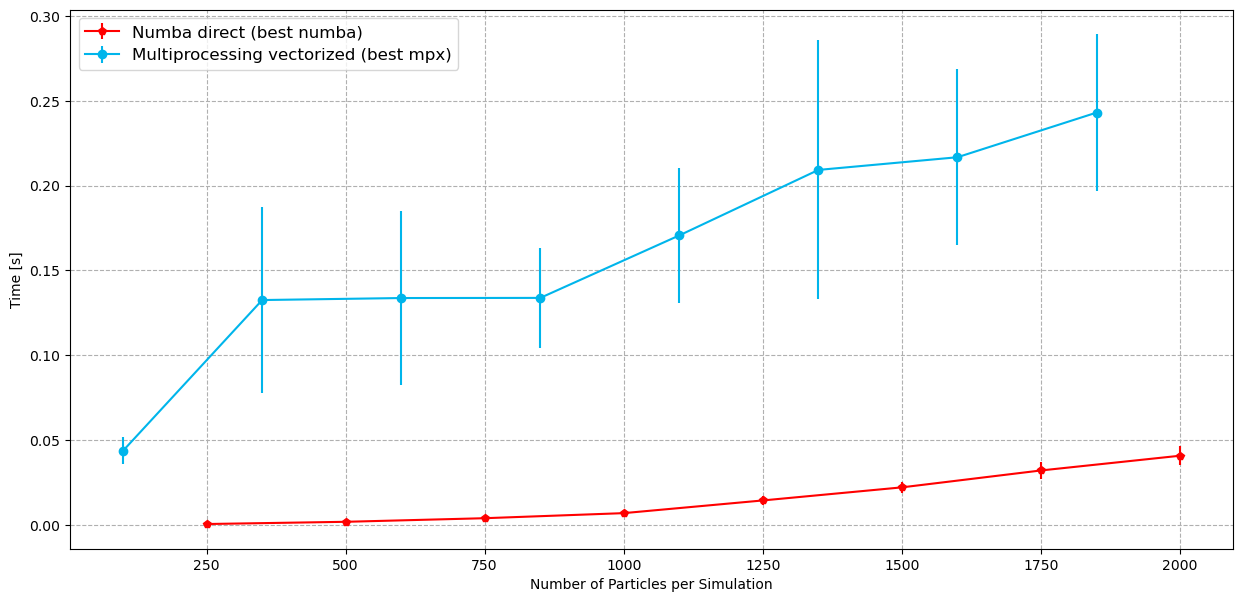

In [16]:
fig, axs = plt.subplots(figsize=(15, 7))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 5)]


i=0
n_particles = np.arange(250,2250,250)
axs.errorbar(n_particles, group_numba["direct_parallel"].values[:, 0], yerr=group_numba["direct_parallel"].values[:, 1], marker="p", linestyle="-", label="Numba direct (best numba)", c=colors[i+4])
    


i = 0 
# each group has n_particles fixed (that is its "name")
n_particles = group_pool["parallel_time"]["mean"].keys().get_level_values(0).values


axs.errorbar(n_particles[:8], group_pool["parallel_time"].values[:8,0], yerr=group_pool["parallel_time"].values[:8,1], marker="o", label="Multiprocessing vectorized (best mpx)", c=colors[1], linestyle='-')


  

# Set labels and title
axs.set_xlabel('Number of Particles per Simulation')
axs.set_ylabel('Time [s]')
axs.grid(linestyle='--')
#axs.legend(handles=axs.get_legend_handles_labels()[:5], labels=axs.get_legend_handles_labels()[1][:5], loc="upper left")
axs.legend(loc="upper left", fontsize=12)


#axs.set_xlim(0, 2000)

plt.savefig("numba_vs_pool.png")
